# Heavy_computations

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'pwrss'

The following object is masked from 'package:stats':

    power.t.test


Attaching package: 'ggdag'

The following object is masked from 'package:stats':

    filter

Here we can place some heavy computations that should not slow down the
rendering of the main document. We can also place solutions to the
coding exercises from the main notebook.

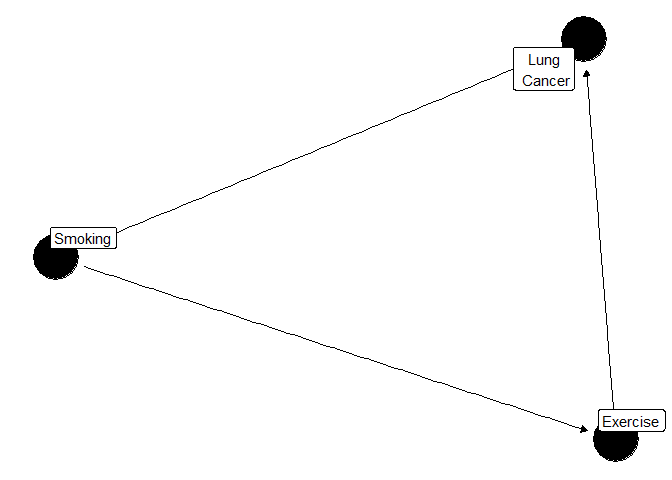

In [ ]:
#| label: fig-dag
#| fig-cap: Directed Acyclic Graph reproduced from a previously published study. 

smoking_ca_dag <- dagify(
  lungcancer ~ exercise + smoking,
  exercise ~ smoking,
  labels = c(
    "lungcancer" = "Lung\n Cancer",
    "smoking" = "Smoking",
    "exercise" = "Exercise"
  ),
  # latent = "smoking",
  exposure = "exercise",
  outcome = "lungcancer"
)

ggdag(smoking_ca_dag, text = FALSE, use_labels = "label") +
  theme_void()
# 
# ggdag_paths(smoking_ca_dag, text = FALSE, use_labels = "label", shadow = TRUE) +
#   theme_void()

# ggdag_adjustment_set(smoking_ca_dag, text = FALSE, use_labels = "label", shadow = TRUE) +
#   theme_void()

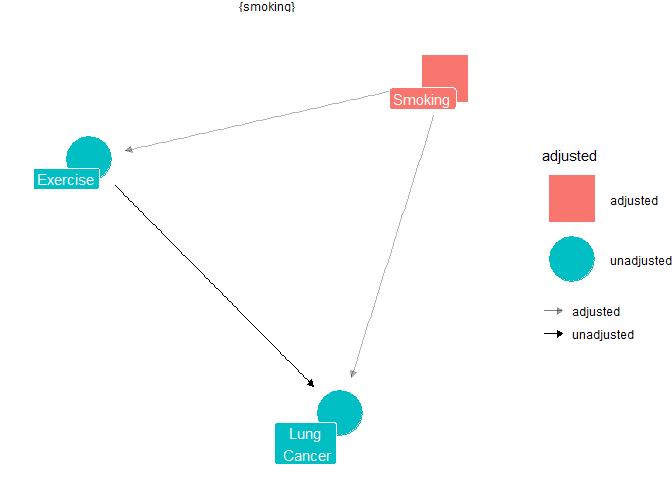

In [ ]:
#| label: fig-dagadjustment
#| fig-cap: The adjustment set for the Directed Acyclic Graph reproduced from a previously published study. 

ggdag_adjustment_set(smoking_ca_dag, text = FALSE, use_labels = "label", shadow = TRUE) +
  theme_void()

To learn more about adjustment sets, see @ggdag.

We can also make an inclusion/exclusion flowchart.

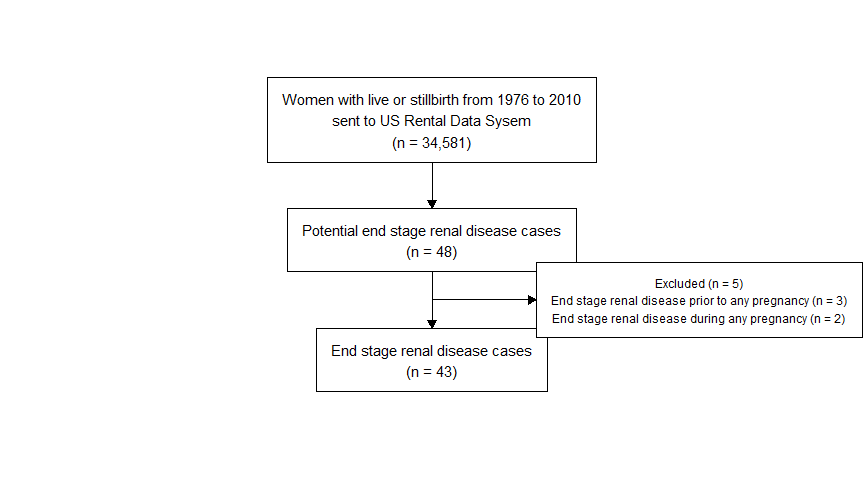

In [ ]:
#| label: fig-flowchart-embeded
#| fig-cap: Flowchart created with the `flowchart` library, but this time saved in another notebook.
#| fig-width: 9

n_total <- 34581
n_potential <- 48
n_prior_pregnancy <- 3
n_pregnancy <- 2
n_excluded <- n_prior_pregnancy + n_pregnancy
n_included <- n_potential - n_excluded

ids_potential <- sample(n_total, n_potential)  
ids_excluded <- sample(ids_potential, n_excluded)
ids_pregnancy <- sample(ids_excluded, n_pregnancy)
ids_prior_pregnancy <- ids_excluded[!ids_excluded %in% ids_pregnancy]
  
all_women <- tibble(ids_women = 1:n_total) |> 
  mutate(potential = ids_women %in% ids_potential,
         excluded = ids_women %in% ids_excluded,
         prior_pregnancy = ids_women %in% ids_prior_pregnancy,
         pregnancy = ids_women %in% ids_pregnancy,
         included = ids_women %in% ids_potential & !ids_women %in% ids_excluded)

text_pattern <- "{label}\n(n = {format(n, big.mark=',')})"

all_women |> 
  as_fc(label = "Women with live or stillbirth from 1976 to 2010\nsent to US Rental Data Sysem",
        text_pattern = text_pattern, text_fs = 12) |> 
  fc_filter(potential, label = "Potential end stage renal disease cases", text_pattern = text_pattern, text_fs = 12) |> 
  fc_filter(included, label = "End stage renal disease cases", text_pattern = text_pattern, show_exc = TRUE, text_fs = 12) |> 
  fc_modify(
    ~ . |> 
      mutate(
        text = ifelse(id == 4, str_glue("Excluded (n = {n_excluded})\nEnd stage renal disease prior to any pregnancy (n = {sum(all_women$prior_pregnancy)})\nEnd stage renal disease during any pregnancy (n = {sum(all_women$pregnancy)})"), text),
        x = case_when(
          id == 4 ~ 0.81,
          .default = x
        ),
        text_fs = case_when(
          id == 4 ~ 9,
          .default = 11
        ),
        # just = "left"
      )
  ) |> 
  fc_draw(box_corners = "sharp")

## Solutions

> **Task II**
>
> 1.  
>
> ``` r
> power_calculation <- pwrss.t.2means(mu1 = 30, mu2 = 25, sd1 = 11, sd2 = 8, kappa = 1, 
>                power = .80, alpha = 0.05,
>                alternative = "not equal")
> ```
>
>      Difference between Two means 
>      (Independent Samples t Test) 
>      H0: mu1 = mu2 
>      HA: mu1 != mu2 
>      ------------------------------ 
>       Statistical power = 0.8 
>       n1 = 60 
>       n2 = 60 
>      ------------------------------ 
>      Alternative = "not equal" 
>      Degrees of freedom = 118 
>      Non-centrality parameter = 2.847 
>      Type I error rate = 0.05 
>      Type II error rate = 0.2 
>
> We used n = 60 wild type and n = 60 knockout mice.
>
> 1.  The total sample size was n = 120.
> 2.  
>
> ``` r
> n_subsample <- 20
> set.seed(42)
> iris_random <- iris |>
>   slice_sample(n = n_subsample) |> 
>   count(Species) |> 
>   pivot_wider(names_from = Species, values_from = n)
> ```
>
> There were n = 6 *I. setosa*, n = 9 *I. virginica*, n = 5 *I.
> versicolor* in this random subsample of n = 20 plants.